In [29]:
import scipy.io as sc
faces = sc.loadmat('face.mat')

In [30]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
faces_content = sio.loadmat('face.mat')
faces_content


{'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ..., 
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
          4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
          6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
          9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
         11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
         12, 13

## Now we will split data into training and test using ratio of 80%-20%

(2576, 416)
(2576, 104)
[[221  99  58 ...  93 227 100]
 [225 100  58 ...  95 232 102]
 [226 100  57 ...  81 235 132]
 ...
 [ 79 114 167 ...  88  43  44]
 [ 78 118 171 ... 100  45  44]
 [ 80 120 171 ...  91  46  47]]
[[38 40  6 28  7 41 32 24  8 22  1 44 36 30 32 51 48 17  1 25 46  1 42 47
  23 33 18 33 20 15 13 46  6 20 42 44 52 42 28  6 50 22  4 39 30 21 20  6
   8  3 22  1 46 43 40  1 15 27 14 22 13  3  7  3 48  2 18 41 48 20  7 52
  26  9 38 32 19 51 49 17 51 40 21 23 34 51  6 20 25 31 36 17 11 34  7 37
  19 46 47 32  9 44 35 42 10 52 49 46 30 10  2 35 20 15 16 16 50 51 17  9
  25 29  7 33 32 15 11 42  1 44 23  2 15 28 52  4 12 49 11 28 33 18 27 12
  17 45 13 41 12 38 37 35 14 37 26 30 41 42 26 24 14  4 51  5  7 20 29 48
  31 22  8  4 31  3 39 52 49 22  3 36 31 16 36 37 14 22 11 42 37 40 22 41
  19 22 45 21 24 26  7  3 22 31 23 13 12 17 45 42  5 28 46  8 33 34  2 29
  44 26 23 17  9 12 51 12 15 16  2 36 34 11 38 14 24 27 41 32 33 43 25 35
  41  2 33 30 27 23 41  1 37 13 29 29  8 19 

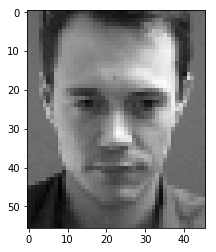

In [126]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

face_data = faces_content['X']
face_id = faces_content['l']

X_train, X_test = train_test_split(face_data.T, test_size = 0.2, random_state = 0)
Y_train, Y_test = train_test_split(face_id.T, test_size = 0.2, random_state = 0)

face_train = X_train.T
face_train_id = Y_train.T
face_test = X_test.T
face_test_id = Y_test.T

print(face_train.shape)
print(face_test.shape)
print(face_train)
print(face_train_id)
print(face_test_id)

face_5 = np.reshape(face_train[:,1],(46,56))
plt.imshow(face_5.T, cmap = 'gist_gray')

#face_n = np.reshape(face_data[:,395],(46,56))
#plt.imshow(face_n.T, cmap = 'gist_gray')

### As can be seen, the training data of pixels corresponds to the training data of IDs. Next up, we will perform PCA, ie find the eigenvectors and eigenvalues. We don't need to normalise and centralise the data.

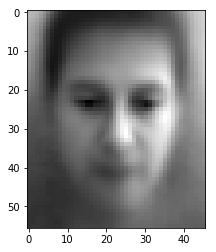

In [128]:
a=np.average(face_data.T, axis = 0)
face_aver = np.reshape(a,(46,56))
plt.imshow(face_aver.T, cmap = 'gist_gray')